# Part 4: Analyzing data between household incomes and drug usage in adolescence (2019)

## In order to compare the two sets of data, we want to first begin by acquiring the intended data to input into an Excel file.

### After you've managed to do so, all we will need to do before we begin our graphing/analysis, is save the file as a ".csv" file.

In [2]:
# To make sure we've done everything correctly so far, we want to first, view the file location and make sure we can access it in our Notebook

from os import listdir
listdir()

['.ipynb_checkpoints',
 'annual_hh.i_to_montly_drug.u_adol-Copy1.ipynb',
 'annual_hhi_to_montly_drugu_adol-Copy1.ipynb',
 'annual_hhi_to_montly_drugu_adol.ipynb',
 'archive_hhi_wu_adol.ipynb',
 'Code.PNG',
 'hhincome_weed_adolesence.csv',
 'hhincome_weed_adolesence.csv.xlsx',
 'hhincome_weed_adolesence.png',
 'hhincome_weed_adolesence.xlsx',
 'hhincome_weed_adolesence_UPDATED.csv',
 'hhi_r_alc_adol.png',
 'hhi_r_cig_adol.png',
 'hhi_r_weed_adol.png',
 'Important stuff for testing.PNG',
 'more helpful refrence.PNG',
 'R_analysis_alc.PNG',
 'R_analysis_cig.PNG',
 'R_analysis_weed.PNG']

### Now that we know we have our Excel file accessible and in the correct location (saved as a .csv) we can import the document into our notebook with pandas.

In [3]:
import pandas as pd
df = pd.read_csv('hhincome_weed_adolesence.csv')

# Just to be extra sure, we can use df.head()
#to display part of the data from the file

df.head()

# and just a clarifying detail, the weed usage 
#is displayed as a decimal rather than a percentage 
#and incomes are rounded to the nearest $500 for
#cleaner data that's easier to use.

,alphabetic_rank,state,weed_use,alc_use,cig_use,hh_income
0,24,Mississippi,0.05,0.07,0.01,45500
1,18,Louisiana,0.05,0.08,0.03,52500
2,31,New Mexico,0.08,0.08,0.03,54000
3,48,West Virginia,0.06,0.09,0.03,54500
4,4,Arkansas,0.06,0.08,0.01,55000


### Now that we know we have the initial setup out of the way, we can now start on working it into a scatter plot with the help of matplotlib and numpy!

In [4]:
import matplotlib.pyplot as plt
import numpy as np

### Since we have now imported the ability to depict our data, the next step is to plot our x and y data onto a  scatter plot with a trendline!

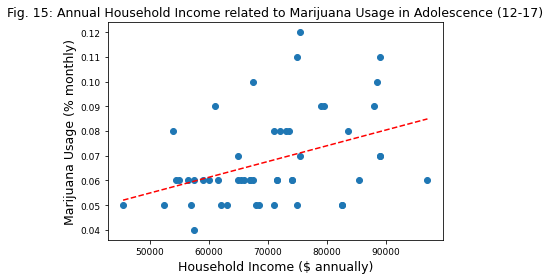

In [18]:
#First, we will want to determine our x & y variables

x = list(df['hh_income'])
y = list(df['weed_use'])
labels = list(df.index)

#Now you can plot you x & y on the graph
#and work on adding axis titles

plt.scatter(x,y)

#With your titles, you can also adjust
#the size of your text with ,fontsize = n

plt.title('Fig. 15: Annual Household Income related to Marijuana Usage in Adolescence (12-17)',fontsize = 12.5)
plt.xlabel('Household Income ($ annually)',fontsize = 12.5)
plt.ylabel('Marijuana Usage (% monthly)',fontsize = 12.5)

#Another thing you can fiddle with
#on your graph are the tick marks
#by plt.aticks

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

#Last but not least, the trendline

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Finally you can save your figure and display
#it right here in your notebook!

plt.savefig('hhi_r_weed_adol.png', bbox_inches='tight', dpi=320)

plt.show()

## Congrats, you now have a sweet scatter plot in your notebook!

### One last thing you can do before finishing up, is checking the summary (regression analysis) of your scatter plot with the code listed below

In [6]:
###### First we have to import the function
#to asses the model

import statsmodels.formula.api as smf

#Now we will compare the two against each other

model = smf.ols(formula='weed_use ~ hh_income',data=df)

#Now print it out!

print(model)
results = model.fit()
print(results)
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               weed_use   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     9.016
Date:                Thu, 17 Mar 2022   Prob (F-statistic):            0.00424
Time:                        19:52:31   Log-Likelihood:                 133.53
No. Observations:                  50   AIC:                            -263.1
Df Residuals:                      48   BIC:                            -259.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0230      0.015      1.520      0.1

## So now that we have our first variable graphed against Income, now we will do the same thing for the other two.

### The next one we will asses will be alcohol.

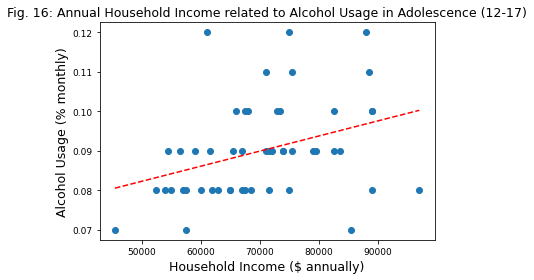

In [19]:
#Like last time, we will want to determine
#our x & y variables, which in this case,
#x will stay the same

x = list(df['hh_income'])
y = list(df['alc_use'])
labels = list(df.index)

#Again, plot it like last time

plt.scatter(x,y)

#Add your titles and modify to your liking

plt.title('Fig. 16: Annual Household Income related to Alcohol Usage in Adolescence (12-17)',fontsize = 12.5)
plt.xlabel('Household Income ($ annually)',fontsize = 12.5)
plt.ylabel('Alcohol Usage (% monthly)',fontsize = 12.5)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

#Don't forget the trendline

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Lastly, save your figure and take a look

plt.savefig('hhi_r_alc_adol.png', bbox_inches='tight', dpi=320)

plt.show()

### Here's the regression analysis for alcohol:

In [9]:
#Compare alcohol now

model = smf.ols(formula='alc_use ~ hh_income',data=df)

print(model)
results = model.fit()
print(results)
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                alc_use   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     6.812
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0120
Time:                        19:52:55   Log-Likelihood:                 152.16
No. Observations:                  50   AIC:                            -300.3
Df Residuals:                      48   BIC:                            -296.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0632      0.010      6.064      0.0

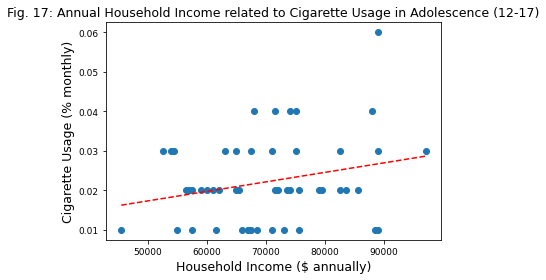

In [20]:
#We'll change the y again,this time
#to our cigarette variable and
#x will stay the same

x = list(df['hh_income'])
y = list(df['cig_use'])
labels = list(df.index)

#Plot it back up

plt.scatter(x,y)

#Add your titles and make those adjustments

plt.title('Fig. 17: Annual Household Income related to Cigarette Usage in Adolescence (12-17)',fontsize = 12.5)
plt.xlabel('Household Income ($ annually)',fontsize = 12.5)
plt.ylabel('Cigarette Usage (% monthly)',fontsize = 12.5)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

#The trendline

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Save it and display it!

plt.savefig('hhi_r_cig_adol.png', bbox_inches='tight', dpi=320)

plt.show()

In [29]:
#and finally, a regression analysis for Cigarettes

model = smf.ols(formula='cig_use ~ hh_income',data=df)

print(model)
results = model.fit()
print(results)
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                cig_use   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.278
Date:                Wed, 16 Mar 2022   Prob (F-statistic):             0.0765
Time:                        23:03:08   Log-Likelihood:                 157.00
No. Observations:                  50   AIC:                            -310.0
Df Residuals:                      48   BIC:                            -306.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.009      0.561      0.5